# Bay Wheels's Trip Data Analysis

In this notebook I analyzed the Bay area weather condition on Bay Wheels trips. Here, I used the [Bay Area Weather Data](https://www.meteoblue.com/en/weather/archive/export/san-francisco_united-states-of-america_5391959) which includes information about weather variables such as temperature, humidity, wind speed, precipitation and weather events in hourly resolution.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
trip = pd.read_csv('trip.csv')
weather = pd.read_csv('weather.csv')

# Data Wrangling

In [3]:
#trip=trip.rename(columns={"bike id":"bike_id","start date": "start_date","start station name": "start_station_name","start station id":"start_station_id","end date":"end_date","end station name":"end_station_name","end station id":"end_station_id","subscription type":"subscription_type","zip code":"zip_code"})
#trip.dropna(inplace= True)
#weather.dropna(inplace= True)
weather['date'] = pd.to_datetime(weather['date'])  
trip['start_date'] = pd.to_datetime(trip['start_date'])
#for making the dates into the same format for merging
trip['start_date'] = trip['start_date'].dt.strftime('%Y-%m-%d')
weather['date'] = weather['date'].dt.strftime('%Y-%m-%d')
trip_weather = trip.merge(weather, how = 'left', left_on ='start_date', right_on ='date')

# Number of bike trips per day versus the mean temperature

In [4]:
trip_weather.index = pd.to_datetime(trip_weather['start_date']) 
daily_trip_weather = trip_weather.resample('D').agg({'start_date':'count', 'mean_temperature_f':'mean'})
daily_trip_weather.columns = ['trip_number', 'mean_temp']
daily_trip_weather['date']= daily_trip_weather.index
daily_trip_weather.head()

,trip_number,mean_temp,date
start_date,,,
2013-08-29,3740,70.4,2013-08-29
2013-08-30,3570,73.0,2013-08-30
2013-08-31,3200,68.0,2013-08-31
2013-09-01,3530,70.0,2013-09-01
2013-09-02,3305,70.8,2013-09-02


Text(0.5, 1.0, 'Number of bike trips per day versus the mean temperature')

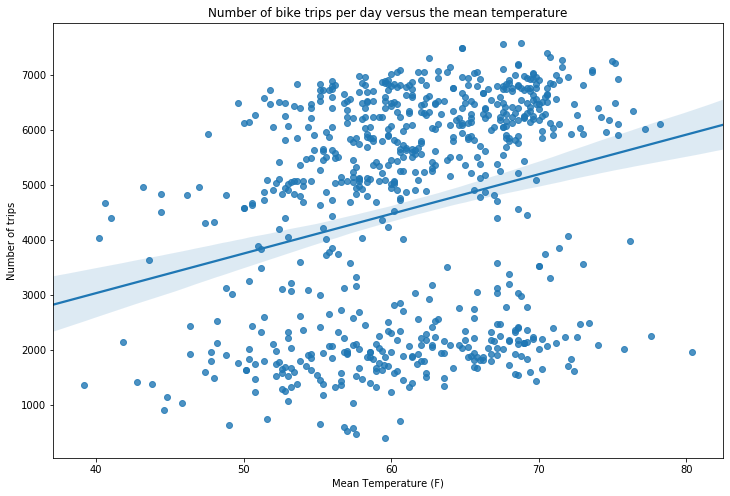

In [5]:
plt.figure(figsize=(12,8))
sns.regplot(data = daily_trip_weather, x = 'mean_temp', y = 'trip_number')
plt.xlabel("Mean Temperature (F)")
plt.ylabel("Number of trips")
plt.title("Number of bike trips per day versus the mean temperature") 

#### Observation

There is a lot of noise here, but there seems to be a trend for more bike trips with warmer weather.  Most likely, since the weather in the bay area is so conistently comfortable, between 50-75 Farenheit, the temperature effect will not be as noticable as it would be if the temperature ranged from 30-100 F. 

# Number of bike trips per day at different weather events

In [6]:
trip_weather.fillna(value={'events': 'Beautiful'}, inplace=True)
weather_groups = trip_weather.groupby('events').agg({'start_date': 'count'})
weather_groups.columns = ['trip_number']
weather_groups.loc['Rain']= weather_groups.loc['Rain'] + weather_groups.loc['rain']
weather_groups.drop('rain', inplace = True)
weather_groups['event'] = weather_groups.index

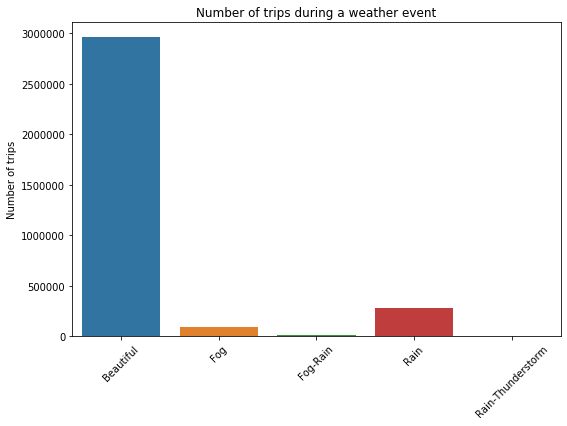

In [7]:
plt.figure(figsize=(8,6))
sns.barplot(data = weather_groups, x = 'event', y = 'trip_number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel("")
plt.ylabel("Number of trips")
plt.title('Number of trips during a weather event')

#### Observation

Looks like weather is not a big factor for this bike share program.  The number of rides carried out on beautiful days far eclipses the othe categories.  Of course this analysis is not counting how many days were beautiful, rather how many rides were carried out on beautiful days, so it is biased in that sense. 